In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/amberkakkar01/Prediction-of-Wine-Quality/master/winequality-red.csv")

In [62]:
x=df.drop(columns=['quality'])
y=df['quality']

In [63]:
x_tr,x_te,y_tr,y_te =train_test_split(x,y,random_state=0)

In [64]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)

In [65]:
bag_dt.fit(x_tr,y_tr)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [66]:
bag_dt_res=bag_dt.predict(x_te)

In [67]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [68]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [69]:
bag_dt.estimator_params

()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
#it is also possible to use multiple models to train & predict data

In [71]:
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=10)

In [72]:
bag_knn.fit(x_tr,y_tr)

BaggingClassifier(base_estimator=KNeighborsClassifier())

In [73]:
bag_knn_res=bag_knn.predict(x_te)

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier(n_estimators=5)

In [76]:
rf.fit(x_tr,y_tr)

RandomForestClassifier(n_estimators=5)

In [77]:
rf_result=rf.predict(x_te)

In [78]:
rf.score(x_te,y_te)

0.615

In [79]:
bag_dt.score(x_te,y_te)

0.665

In [80]:
bag_knn.score(x_te,y_te)

0.49

In [81]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1638892559),
 DecisionTreeClassifier(max_features='auto', random_state=1765797170),
 DecisionTreeClassifier(max_features='auto', random_state=1875472163),
 DecisionTreeClassifier(max_features='auto', random_state=1826720627),
 DecisionTreeClassifier(max_features='auto', random_state=1241376183)]

In [82]:
#one estimator
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1638892559)

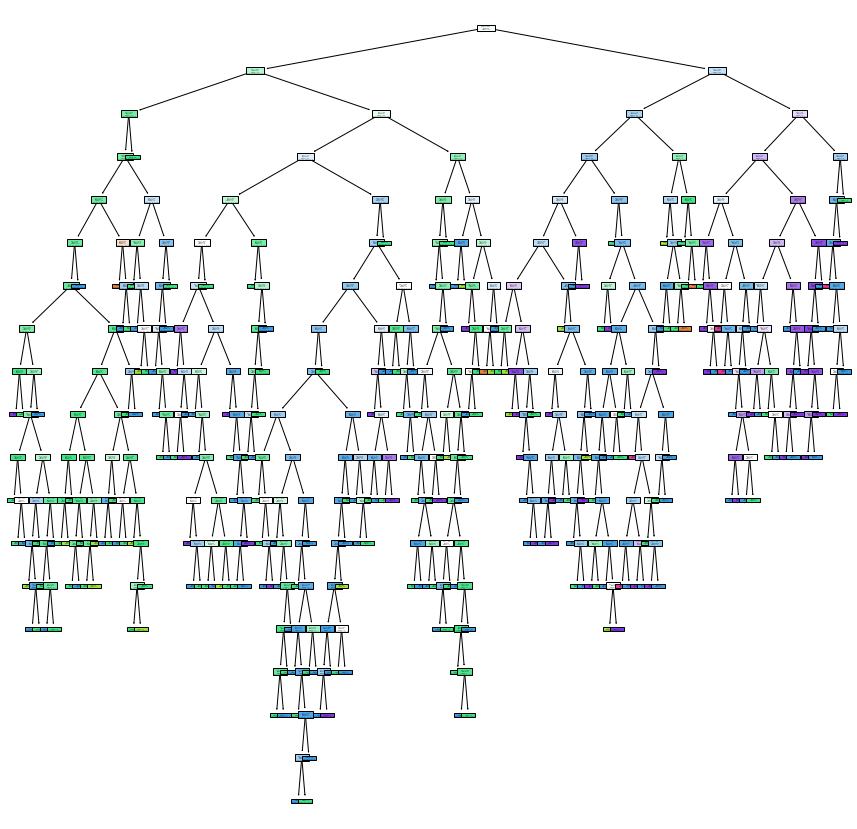

In [83]:
plt.figure(figsize=(15,15))
tree.plot_tree(rf.estimators_[0],filled=True)
plt.show()

[Text(421.8538125, 791.4176470588235, 'X[9] <= 0.585\ngini = 0.65\nsamples = 772\nvalue = [7, 45, 521, 451, 163, 12]'),
 Text(201.193875, 743.4529411764706, 'X[6] <= 48.5\ngini = 0.551\nsamples = 298\nvalue = [3, 29, 281, 129, 23, 0]'),
 Text(132.31575, 695.4882352941177, 'X[6] <= 26.5\ngini = 0.626\nsamples = 176\nvalue = [3, 25, 139, 94, 18, 0]'),
 Text(91.698, 647.5235294117647, 'X[2] <= 0.295\ngini = 0.572\nsamples = 94\nvalue = [3, 8, 89, 32, 15, 0]'),
 Text(67.332, 599.5588235294117, 'X[7] <= 0.998\ngini = 0.473\nsamples = 61\nvalue = [3, 8, 73, 11, 8, 0]'),
 Text(51.336, 551.5941176470587, 'X[2] <= 0.025\ngini = 0.43\nsamples = 55\nvalue = [2, 3, 68, 11, 8, 0]'),
 Text(37.2, 503.6294117647059, 'X[8] <= 3.575\ngini = 0.633\nsamples = 20\nvalue = [2, 2, 19, 4, 8, 0]'),
 Text(26.784, 455.66470588235296, 'X[1] <= 0.625\ngini = 0.549\nsamples = 18\nvalue = [0, 2, 19, 2, 8, 0]'),
 Text(14.879999999999999, 407.7, 'X[0] <= 7.05\ngini = 0.595\nsamples = 9\nvalue = [0, 0, 7, 2, 8, 0]'),
 

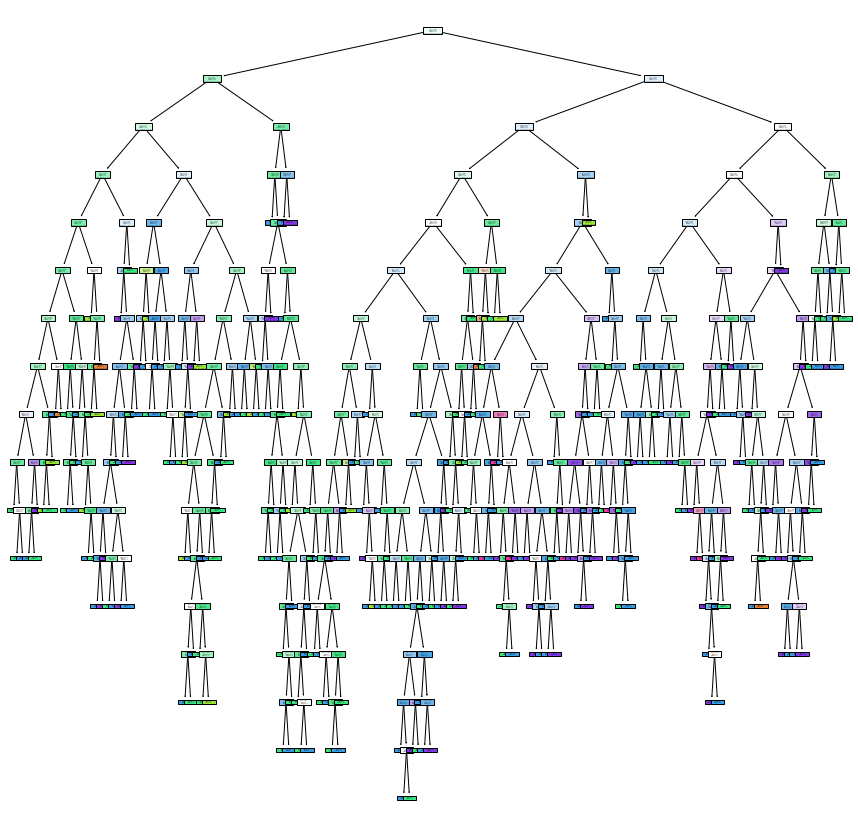

In [84]:
plt.figure(figsize=(15,15))
tree.plot_tree(rf.estimators_[1],filled=True)

In [94]:
gird_params={
    "n_estimators":[5,10,50,100,120,150],
    "criterion":['gini','entropy'],
    "max_depth":range(10),
    'min_samples_leaf':range(10)
    
}

In [95]:
rf=RandomForestClassifier(n_estimators=5)
grid_res=GridSearchCV(param_grid=gird_params,cv=10,n_jobs=6,verbose=1,estimator=rf)

In [96]:
grid_res.fit(x_tr,y_tr)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.64222689 0.62136555 0.62887255]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [97]:
grid_res.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [99]:
new_rf = RandomForestClassifier(criterion= 'entropy',
 max_depth= 9,
 min_samples_leaf= 1,
 n_estimators= 120)

In [100]:
new_rf.fit(x_tr,y_tr)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [101]:
new_rf.score(x_te,y_te)

0.665

In [102]:
new_rf.score(x_tr,y_tr)

0.9532944120100083